# ResNet-Competition

__Author:<br>
Maximilian Karlström [maxik@kth.se](mailto:maxik@kth.se)__

In [27]:
from keras.layers import Dense, Flatten, Add, Activation, Input, concatenate
from keras import backend as K
from keras.models import Model
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [28]:
K.set_image_dim_ordering('th')
ES = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [29]:
activationFunc = 'relu'
activationFunc = tf.nn.swish

def initBlock():
    inputTensor = Input(shape=(1,28,28))
    x = Flatten()(inputTensor)
    return inputTensor,x 

def toModel(x, inputTensor):
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputTensor, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

def resnetModel():
    inputTensor, x = initBlock()
    x = Dense(10, activation=activationFunc)(x)
    for i in range(9):
        y = Dense(10, activation=activationFunc)(x)
        y = Dense(10, activation=activationFunc)(y)
        x = Add()([y,x])
    return toModel(x, inputTensor)

def densedenseModel():
    inputTensor, x = initBlock()
    x = Dense(10, activation=activationFunc)(x)
    for i in range(6):
        y = Dense(8, activation=activationFunc)(x)
        x = concatenate([x,y],axis=1)
    return toModel(x, inputTensor)
    
def fullconModel():
    inputTensor,x  = initBlock()
    for i in range(10):
        x = Dense(11, activation=activationFunc)(x)
    return toModel(x, inputTensor)

In [46]:
resnet = resnetModel()
print("Size of resnet:          ", resnet.count_params())
fullcon = fullconModel()
print("Size of fully connnected:",fullcon.count_params())
densedense = densedenseModel()
print("Size of dense:           ",densedense.count_params())

history=[1,2,3]

Size of resnet:           9940
Size of fully connnected: 9943
Size of dense:            9928


In [47]:
# Fit the model
history[0] = fullcon.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[ES], epochs=100, batch_size=100, verbose=2)
# Final evaluation of the model
scores = fullcon.evaluate(X_test, y_test, verbose=0)
print("Fully connected misclassification: %.2f%%" % (100-scores[1]*100)) # 6.47 %

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 1.2904 - acc: 0.5454 - val_loss: 0.7126 - val_acc: 0.7839
Epoch 2/100
 - 3s - loss: 0.5696 - acc: 0.8331 - val_loss: 0.4510 - val_acc: 0.8709
Epoch 3/100
 - 2s - loss: 0.4162 - acc: 0.8825 - val_loss: 0.3840 - val_acc: 0.8912
Epoch 4/100
 - 2s - loss: 0.3587 - acc: 0.8991 - val_loss: 0.3733 - val_acc: 0.8969
Epoch 5/100
 - 2s - loss: 0.3204 - acc: 0.9108 - val_loss: 0.3415 - val_acc: 0.9015
Epoch 6/100
 - 2s - loss: 0.2987 - acc: 0.9164 - val_loss: 0.2913 - val_acc: 0.9207
Epoch 7/100
 - 2s - loss: 0.2784 - acc: 0.9221 - val_loss: 0.2865 - val_acc: 0.9201
Epoch 8/100
 - 2s - loss: 0.2620 - acc: 0.9257 - val_loss: 0.2762 - val_acc: 0.9222
Epoch 9/100
 - 2s - loss: 0.2509 - acc: 0.9289 - val_loss: 0.2778 - val_acc: 0.9215
Epoch 10/100
 - 2s - loss: 0.2412 - acc: 0.9319 - val_loss: 0.2840 - val_acc: 0.9200
Epoch 11/100
 - 2s - loss: 0.2313 - acc: 0.9344 - val_loss: 0.2567 - val_acc: 0.9275
Epoch 12/100
 - 2s - los

In [48]:
# Fit the model
history[1] = resnet.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[ES], epochs=100, batch_size=100, verbose=2)
# Final evaluation of the model
scores = resnet.evaluate(X_test, y_test, verbose=0)
print("Resnet misclassification: %.2f%%" % (100-scores[1]*100))  #5.80

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.5751 - acc: 0.8335 - val_loss: 0.2877 - val_acc: 0.9162
Epoch 2/100
 - 3s - loss: 0.2679 - acc: 0.9216 - val_loss: 0.2390 - val_acc: 0.9301
Epoch 3/100
 - 3s - loss: 0.2230 - acc: 0.9339 - val_loss: 0.2236 - val_acc: 0.9336
Epoch 4/100
 - 3s - loss: 0.1999 - acc: 0.9407 - val_loss: 0.2103 - val_acc: 0.9386
Epoch 5/100
 - 3s - loss: 0.1852 - acc: 0.9444 - val_loss: 0.2006 - val_acc: 0.9390
Epoch 6/100
 - 3s - loss: 0.1752 - acc: 0.9467 - val_loss: 0.1917 - val_acc: 0.9442
Epoch 7/100
 - 3s - loss: 0.1661 - acc: 0.9502 - val_loss: 0.1851 - val_acc: 0.9451
Epoch 8/100
 - 3s - loss: 0.1571 - acc: 0.9525 - val_loss: 0.1879 - val_acc: 0.9448
Epoch 9/100
 - 3s - loss: 0.1529 - acc: 0.9539 - val_loss: 0.1744 - val_acc: 0.9489
Epoch 10/100
 - 3s - loss: 0.1459 - acc: 0.9553 - val_loss: 0.1700 - val_acc: 0.9505
Epoch 11/100
 - 3s - loss: 0.1418 - acc: 0.9568 - val_loss: 0.1772 - val_acc: 0.9479
Epoch 12/100
 - 3s - los

In [49]:
# Fit the model
history[2] = densedense.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[ES], epochs=100, batch_size=100, verbose=2)
# Final evaluation of the model
scores = densedense.evaluate(X_test, y_test, verbose=0)
print("Densely dense connected misclassification: %.2f%%" % (100-scores[1]*100)) # 4.86 %

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 0.5061 - acc: 0.8532 - val_loss: 0.2790 - val_acc: 0.9175
Epoch 2/100
 - 2s - loss: 0.2647 - acc: 0.9226 - val_loss: 0.2617 - val_acc: 0.9222
Epoch 3/100
 - 2s - loss: 0.2317 - acc: 0.9314 - val_loss: 0.2299 - val_acc: 0.9323
Epoch 4/100
 - 2s - loss: 0.2088 - acc: 0.9378 - val_loss: 0.2093 - val_acc: 0.9388
Epoch 5/100
 - 2s - loss: 0.1924 - acc: 0.9423 - val_loss: 0.1970 - val_acc: 0.9419
Epoch 6/100
 - 2s - loss: 0.1800 - acc: 0.9460 - val_loss: 0.2006 - val_acc: 0.9393
Epoch 7/100
 - 2s - loss: 0.1689 - acc: 0.9498 - val_loss: 0.1759 - val_acc: 0.9485
Epoch 8/100
 - 2s - loss: 0.1609 - acc: 0.9510 - val_loss: 0.1853 - val_acc: 0.9459
Epoch 9/100
 - 2s - loss: 0.1547 - acc: 0.9528 - val_loss: 0.1707 - val_acc: 0.9500
Epoch 10/100
 - 2s - loss: 0.1483 - acc: 0.9549 - val_loss: 0.1771 - val_acc: 0.9487
Epoch 11/100
 - 2s - loss: 0.1449 - acc: 0.9556 - val_loss: 0.1738 - val_acc: 0.9485
Epoch 12/100
 - 2s - los

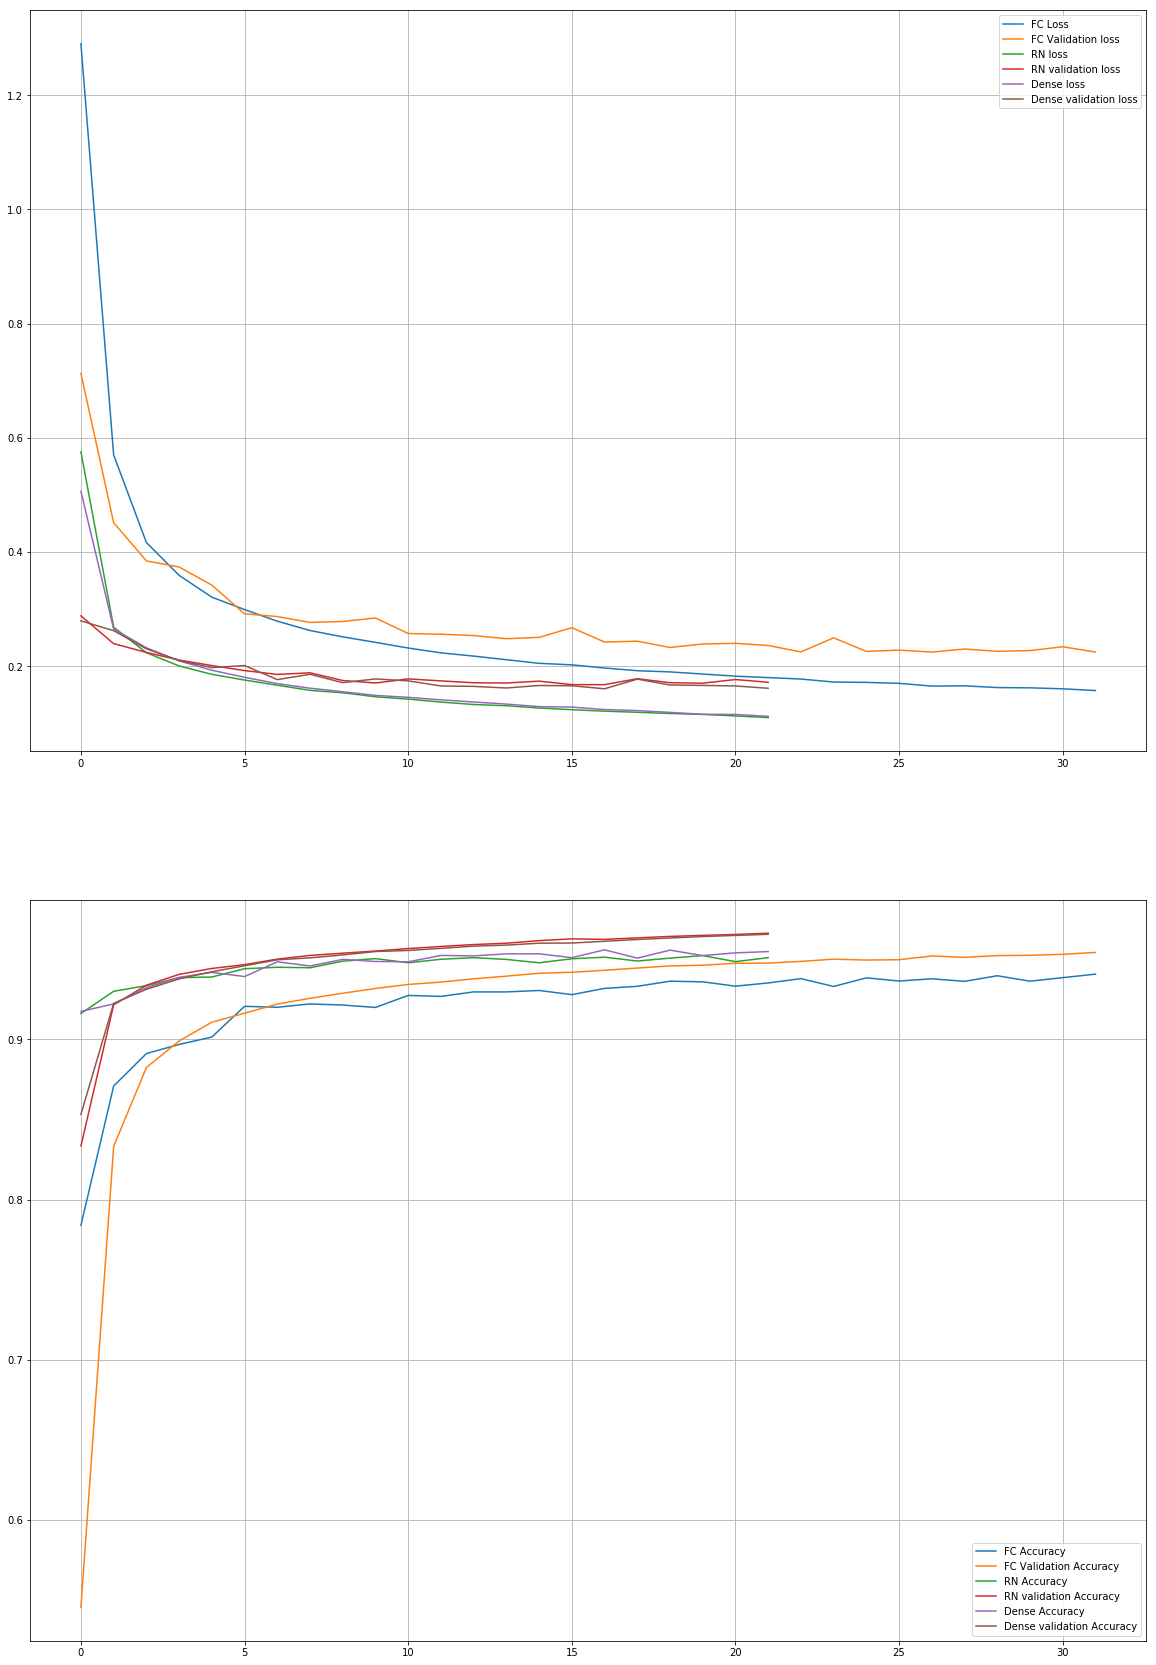

In [50]:
plt.figure(figsize=(20,30))

for i in range(3):
    for key in history[i].history:
        if 'loss' in key:
            plt.subplot(211)
            plt.plot(history[i].history[key])
        else:
            plt.subplot(212)
            plt.plot(history[i].history[key])

            plt.subplot(211)            
plt.legend(['FC Loss', 'FC Validation loss', 'RN loss', 'RN validation loss', 'Dense loss', 'Dense validation loss'])
plt.grid()
plt.subplot(212)
plt.grid()
plt.legend(['FC Accuracy','FC Validation Accuracy','RN Accuracy','RN validation Accuracy','Dense Accuracy','Dense validation Accuracy'])

plt.show()